## Predicting Vilnius Housing Prices

- The goal of this project is to analyse and predict housing prices in Vilnius.

- The dataset was scraped from a Lithuanian real estate website (Aruodas) from 2025/11/03 to 2025/11/04. The dataset describes housing units listed on the website and includes attributes such as municipality and street in which the housing unit is located, housing price, floor space, distance to points of interest (bus stops/shops/train station/cathedral), etc.

### Libraries

In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [3]:
objects = pd.read_csv('objects.csv')

## Dataset overview

In [4]:
objects

,city,municipality,street,object_name,total_views,views_today,likes,price,price_sq,house_number,...,distance_shop,crimes,no2,kd10,time_cathedral,time_train_station,distance_cathedral,distance_train_station,description,contact
0,Vilnius,Verkiai,Verkių g.,4 kambarių butas,14967,73,54.0,555000,3881,68,...,580.0,NaN,NaN,NaN,24.5,30.5,6.6,9.0,"Ypatingas butas Verkiuose, Vilniuje.\n\nParduo...",+37065776060
1,Vilnius,Markučiai,Subačiaus g.,1 kambario butas,10790,58,55.0,37200,2325,120,...,80.0,NaN,NaN,NaN,11.5,9.5,3.4,3.0,Parduodamas vieno kambario butas (bloke) su be...,+370 606 22194
2,Vilnius,Naujininkai,Pelesos g.,1 kambario butas,7430,135,25.0,9988,188,37,...,300.0,14.0,123.0,23.33,14.0,5.5,3.8,1.4,VILNIAUS MIESTO SAVIVALDYBĖ VIEŠO AUKCIONO BŪD...,+370 521 12711
3,Vilnius,Senamiestis,Bokšto g.,3 kambarių butas,21152,75,208.0,350000,4487,NaN,...,240.0,4.0,NaN,NaN,6.0,9.5,1.3,2.2,"PARDUODAMAS 3 kambarių, 78 m² butas Vilniaus S...",+370 612 40254
4,Vilnius,Naujoji Vilnia,Pramonės g.,1 kambario poilsio patalpa,23620,63,108.0,41900,1496,107,...,780.0,1.0,NaN,NaN,23.5,21.0,11.4,10.8,Parduodamas studijos tipo būstas Pramonės g. 1...,+37065571147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,327,0,53.0,340000,3463,5,...,500.0,1.0,NaN,NaN,22.5,17.5,7.0,4.8,BUTAI JAU PASTATYTI !\nPagrindinės pirkimo – p...,NaN
2951,Vilnius,Vilkpėdė,Eigulių g.,3 kambarių butas,346,0,8.0,370000,4792,5,...,500.0,1.0,NaN,NaN,22.5,17.5,7.0,4.8,BUTAI JAU PASTATYTI !\nPagrindinės pirkimo – p...,NaN
2952,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,227,0,6.0,396200,4851,NaN,...,390.0,3.0,NaN,NaN,21.0,16.5,6.8,4.7,REVINGIO kvartalas įsikūręs kaimynystėje su Vi...,NaN
2953,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,255,0,16.0,582200,5213,NaN,...,440.0,1.0,NaN,NaN,22.0,18.5,6.9,4.4,REVINGIO kvartalas įsikūręs kaimynystėje su Vi...,NaN


In [5]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2955 non-null   object 
 1   municipality            2955 non-null   object 
 2   street                  2955 non-null   object 
 3   object_name             2955 non-null   object 
 4   total_views             2955 non-null   int64  
 5   views_today             2955 non-null   int64  
 6   likes                   2926 non-null   float64
 7   price                   2955 non-null   int64  
 8   price_sq                2955 non-null   int64  
 9   house_number            2125 non-null   object 
 10  flat_number             446 non-null    object 
 11  area                    2955 non-null   float64
 12  rooms                   2955 non-null   int64  
 13  floor                   2955 non-null   int64  
 14  total_floors            2955 non-null   

### City

In [6]:
objects['city'].describe()

count        2955
unique          1
top       Vilnius
freq         2955
Name: city, dtype: object

All housing units in the dataset are located in Vilnius.

### Municipality

In [9]:
objects['municipality'].value_counts()

municipality
Naujamiestis          383
Senamiestis           359
Šnipiškės             185
Pašilaičiai           156
Žirmūnai              155
Antakalnis            150
Pilaitė               135
Justiniškės           130
Žvėrynas              114
Naujininkai            93
Naujoji Vilnia         88
Baltupiai              83
Lazdynai               82
Fabijoniškės           79
Viršuliškės            77
Vilkpėdė               70
Markučiai              61
Šeškinė                55
Karoliniškės           55
Užupis                 48
Bajorai                43
Visoriai               36
Lazdynėliai            34
Burbiškės              33
Jeruzalė               29
Santariškės            26
Šiaurės miestelis      26
Paupys                 25
Valakampiai            20
Grigiškės              15
Rasos                  15
Salininkai             14
Žemieji Paneriai       11
Tarandė                10
Dvarčionys              8
Verkiai                 8
Paneriai                6
Pavilnys                6

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_15794/3445661392.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


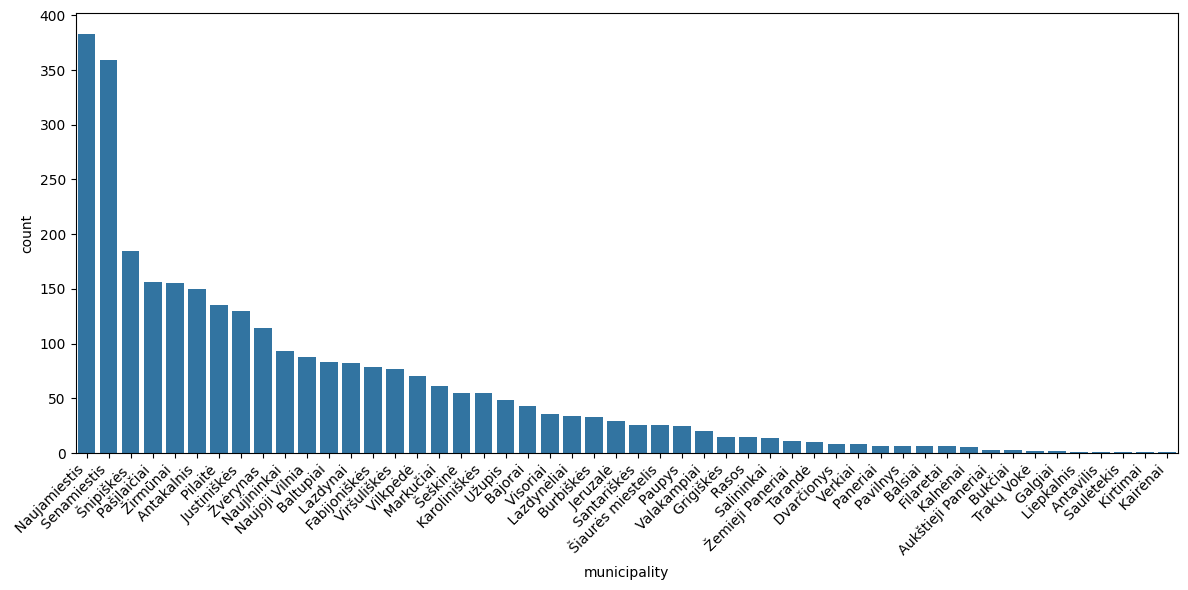

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.countplot(data=objects, x='municipality', order=objects['municipality'].value_counts().index)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Most housing units on sale in Vilnius are located in Naujamiestis and Senamiestis. These municipalities are located at the heart of Vilnius and therefore have the most interest from buyers and real estate developers. Least popular municipalities are on the outskirts of Vilnius (in Vilnius district).